In [12]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd



/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


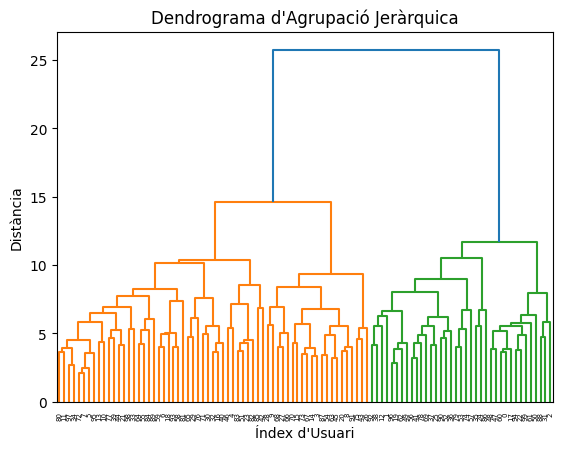

In [14]:
#casos = pd.read_pickle('casos.pkl')

casos = pd.read_pickle('data/usuaris.pkl')

vectors = [cas.vector for cas in casos]

# Calcular la matriu de distàncies
distàncies = pdist(vectors, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies = squareform(distàncies)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes = model.fit_predict(matriu_distàncies)

#casos['cluster'] = etiquetes
# Visualitzar el dendrograma
enllaços = linkage(distàncies, method='ward')
dendrogram(enllaços, labels=range(len(vectors)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex d'Usuari")
plt.ylabel('Distància')
plt.show()

In [15]:
# Obtener las etiquetas de cluster asignadas a cada punto
print("Etiquetas de Cluster:", etiquetes)


Etiquetas de Cluster: [82 71 57 96 75 97 68 98 55 89 51 76 63 72 79 37 85 86 83 99 67 48 88 35
 49 77 56 92 42 64 66 59 27 84 93 78 61 74 38 62 80 31 30 69 87 91 52 73
 39 70 54 90 34 81 95 41 58 60 20 18 45 53 47 65 32 33 94 44 50 46 40 36
 17 43 21  8 25 23 29 24 28 16 15 14 11 13 26 22 10  6  7 12 19  5  2  9
  3  4  1  0]


In [16]:
print(len(etiquetes))
print(len(casos))

100
100


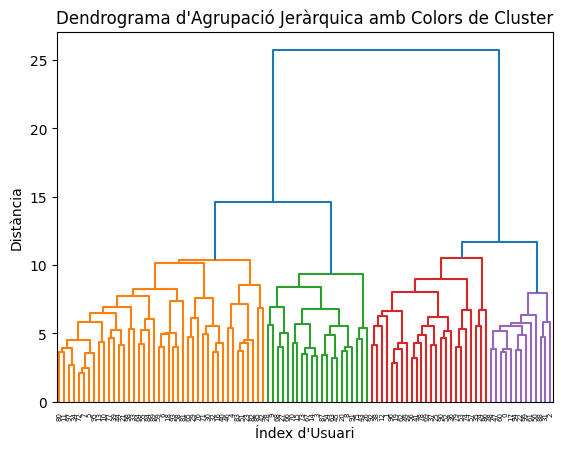

Clusters en el nivel de distancia 11 : [1 2 1 3 4 4 4 4 3 3 4 4 2 4 3 3 4 1 4 2 3 4 1 4 2 2 3 3 3 4 4 1 4 4 4 2 2
 2 2 4 4 2 4 3 4 3 4 1 1 2 1 4 2 2 3 4 2 2 4 4 1 1 2 3 4 4 3 3 3 2 3 4 4 3
 2 3 4 4 2 2 4 4 4 4 4 4 2 3 1 4 2 3 2 4 1 4 2 4 4 1]


In [35]:
from scipy.cluster.hierarchy import fcluster

# Obtener los clusters en un nivel específico de distancia
nivel_de_distancia = 11  # Ajusta el nivel según tus necesidades
clusters_nivel_distancia = fcluster(enllaços, t=nivel_de_distancia, criterion='distance')

# Visualizar el dendrograma con colores de cluster
dendrogram(enllaços, labels=range(len(vectors)), orientation='top', distance_sort='descending', show_leaf_counts=True,
           color_threshold=nivel_de_distancia)
plt.title('Dendrograma d\'Agrupació Jeràrquica amb Colors de Cluster')
plt.xlabel("Índex d'Usuari")
plt.ylabel('Distància')
plt.show()

# Imprimir los clusters en el nivel de distancia específico
print("Clusters en el nivel de distancia", nivel_de_distancia, ":", clusters_nivel_distancia)


In [27]:
# Convertir el índice del punto a un entero (si es necesario)
indice_punto = 0
vectors=np.array(vectors)
# Obtener la etiqueta de cluster del punto
etiqueta_punto = etiquetes[indice_punto]

# Filtrar los puntos que pertenecen al mismo cluster que el punto de interés
puntos_mismo_cluster = np.where(etiquetes == etiqueta_punto)[0]

# Calcular las distancias entre el punto de interés y los demás puntos en el mismo cluster
distancias_al_punto = np.linalg.norm(vectors[indice_punto] - vectors[puntos_mismo_cluster], axis=1)

# Obtener los índices de los puntos más cercanos
indices_vecinos_cercanos = puntos_mismo_cluster[np.argsort(distancias_al_punto)[1:]]  # Excluye el propio punto

# Imprimir los índices de los vecinos más cercanos
print("Vecinos más cercanos al punto en el índice", indice_punto, ":", indices_vecinos_cercanos)


Vecinos más cercanos al punto en el índice 0 : [60 17 52 96 25 90 78 41 48 19 61 49 37 88 99 47 79 31 69 21 77 10 18 53
 12]
